In [35]:
# import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import math
%matplotlib inline
# %matplotlib widget


Membuat Komputasi Model

In [36]:
der = 180/np.pi
der

57.29577951308232

In [37]:
x=90
np.sin(x/der)

1.0

In [38]:
# Parameter yang digunakan

# parameter model awal
Bo = 180
k = 0.4

# # parameter untuk kanal merah setelah optimasi
# Bo = 180.242
# k = 1.117

# # parameter untuk kanal hijau setelah optimasi
# Bo = 180.243
# k = 1.121

# # parameter untuk kanal biru setelah optimasi
# Bo = 180.247
# k = 1.165

# Parameter Bo dan k akan diubah setelah mendapatkan nilai terbaik dari hasil optimasi

hm = np.linspace(2, 18, 100)
hs = np.linspace(-15, -1, 100)

# Menghitung nilai air mass 

x = 1/(np.cos((90-hm)/der) + 0.025*np.exp(-11*np.cos((90-hm)/der)))
x

array([19.2568476 , 18.44049006, 17.68564393, 16.98580215, 16.33533532,
       15.72934902, 15.16356814, 14.63424229, 14.13806804, 13.67212455,
       13.23382003, 12.82084686, 12.43114394, 12.06286477, 11.71435039,
       11.38410633, 11.07078283, 10.77315784, 10.49012239, 10.22066787,
        9.96387506,  9.71890445,  9.4849879 ,  9.26142126,  9.04755789,
        8.84280296,  8.64660842,  8.45846849,  8.27791577,  8.10451762,
        7.93787309,  7.77761004,  7.62338268,  7.47486923,  7.33176998,
        7.19380537,  7.06071439,  6.93225308,  6.80819315,  6.68832077,
        6.57243548,  6.46034912,  6.35188497,  6.24687685,  6.1451684 ,
        6.04661235,  5.95106988,  5.85841002,  5.76850915,  5.68125044,
        5.59652344,  5.51422365,  5.4342521 ,  5.35651502,  5.28092353,
        5.20739326,  5.13584414,  5.06620011,  4.99838884,  4.93234158,
        4.86799287,  4.80528041,  4.74414482,  4.68452951,  4.62638052,
        4.56964634,  4.51427782,  4.46022798,  4.40745195,  4.35

In [39]:
# Persamaan untuk menghitung kecerlangan bulan dan langit
# Bn = kecerlangan langit malam
# Bt = kecerlangan langit senja
# Bs = kecerlangan bulan

def Bn(hm):
    return Bo*(0.4 + 0.6/(np.sqrt(1 - (0.96*np.sin((90-hm)/der)*np.sin((90-hm)/der)))))*(10**(-0.4*k*x))
    # return Bo*(0.4 + 0.6/(np.sqrt((1-0.96*math.pow(np.sin((90-hm)/der))), 2)))*(10**(-0.4*k*x))

def Bt(hs, hm, el):
    return np.maximum(1, 10**((el/90)-1.1))*(10**(8.45+(0.4*hs)))*(1-(10**(-0.4*k*x)))

def Bs(hm, el):
    alfa = (180-el)
    Luas = (1/8)*((15*np.pi/(60*180))**2)*(1+np.cos(alfa/(180/np.pi)))
    m_moon = -12.73 + (0.026*np.absolute(alfa)) + (alfa**4)*(4e-9)
    I_moonL = 10**((m_moon+16.57)/(-2.5))
    I_moon = I_moonL*(10**(-1*k*x/2.5))
    konv_B = (2.95e-7)*Luas
    return I_moon/konv_B


C:\Users\User\AppData\Local\Temp/ipykernel_16580/2264721646.py:14: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  im = ax.plot_surface(hmo, hsu, lala, rstride=1, cstride=1,


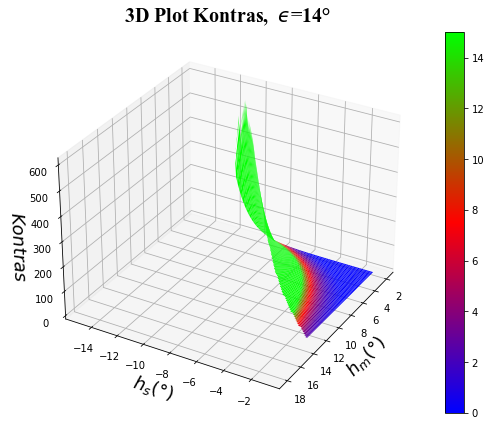

In [8]:
# Membuat plot 3D untuk kontras untuk nilai elongasi = 14

el = 14
hmo, hsu = np.meshgrid(hm, hs)
Bsky = Bn(hmo) + Bt(hsu, hmo, el)

# definisi kontras yang digunakan
c= Bs(hmo, el)/Bsky-1
batas = hmo - hsu
lala = np.select([batas <= el, batas > el], [c, np.NaN])

fig = plt.figure(figsize= (10, 7))
ax = fig.add_subplot(projection='3d')
im = ax.plot_surface(hmo, hsu, lala, rstride=1, cstride=1,
                cmap='brg', edgecolor='none')
im.set_clim(0,15)
fig.colorbar(im, orientation='vertical')

ax.set_xlabel('$h_{m} (°)$', size=18, fontweight='bold')
ax.set_ylabel('$h_{s} (°)$', size=18, fontweight='bold')
ax.set_zlabel('$Kontras$', size=18, fontweight='bold')
ax.set_title('3D Plot Kontras,  $ϵ$=' + str(el) + '°', fontsize=20, fontname='Times New Roman', pad=10, fontweight='bold')

# output plot 3D untuk kontras untuk nilai elongasi = 14

ax.view_init(30, 30)
plt.show()


C:\Users\User\AppData\Local\Temp/ipykernel_2132/1386077148.py:10: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  im = ax.plot_surface(hmo, hsu, lala, rstride=1, cstride=1,


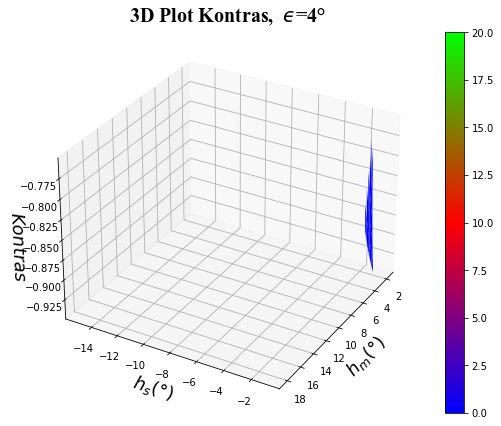

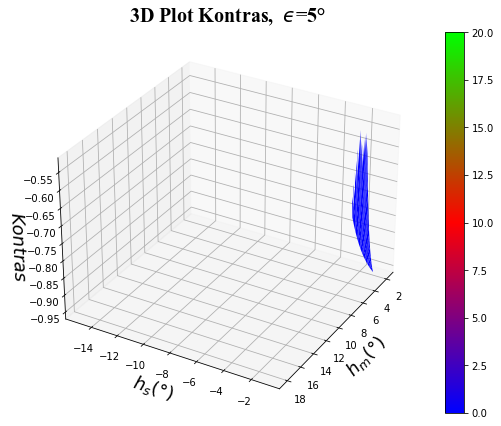

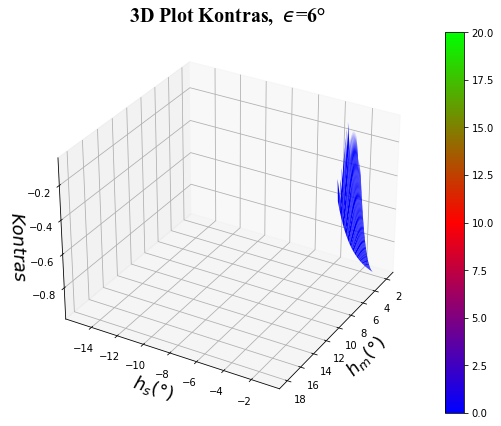

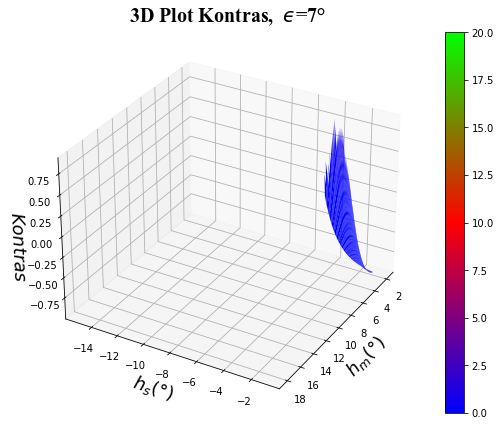

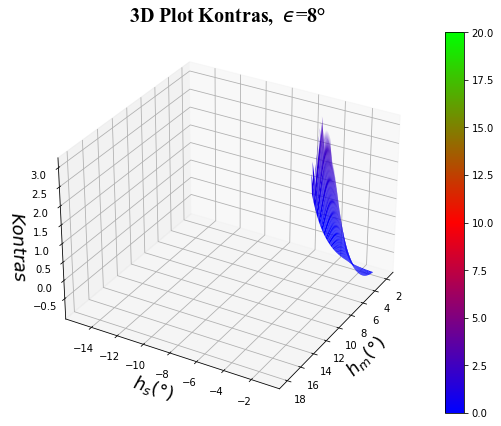

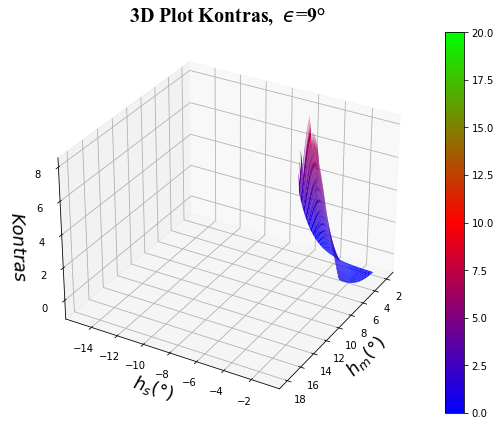

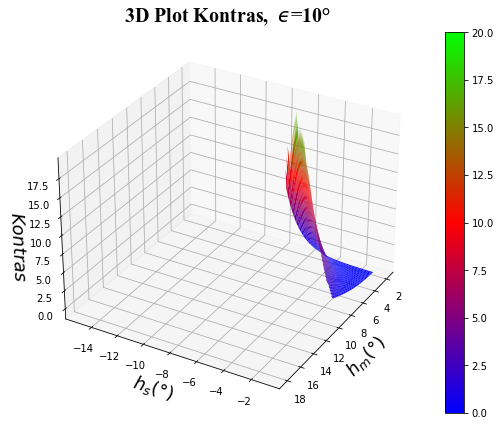

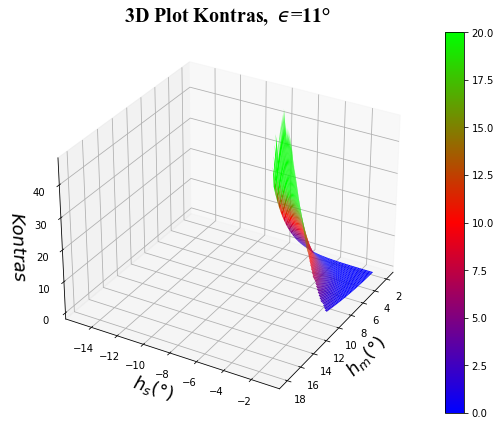

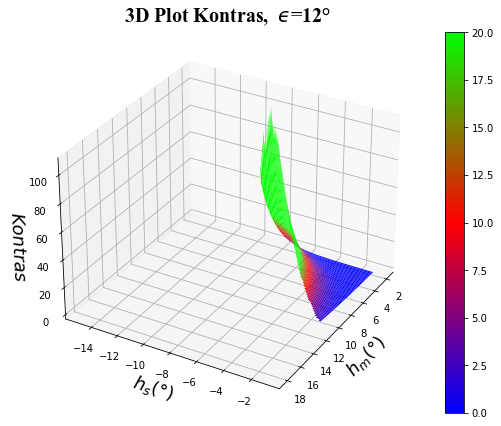

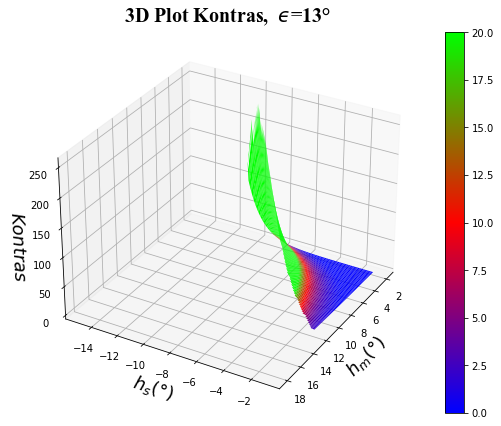

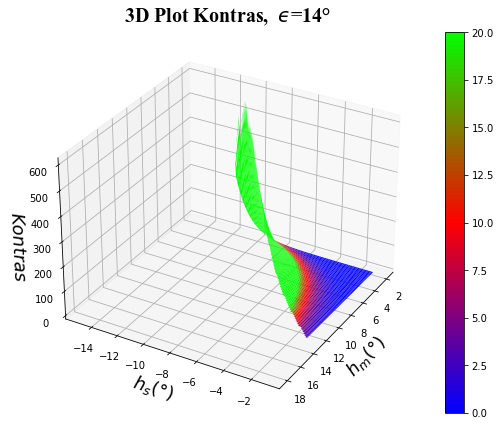

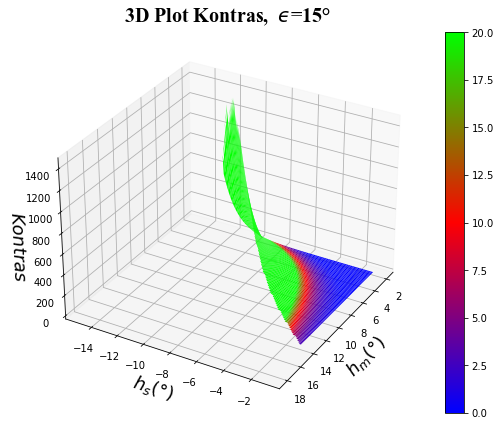

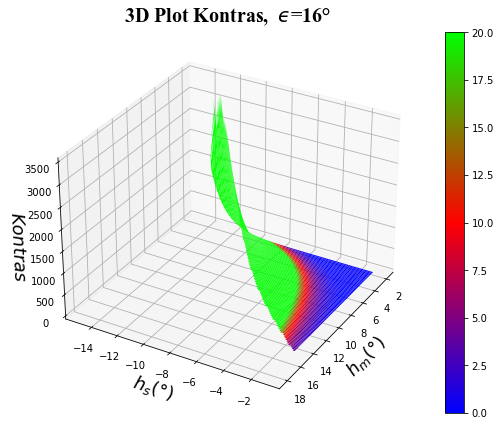

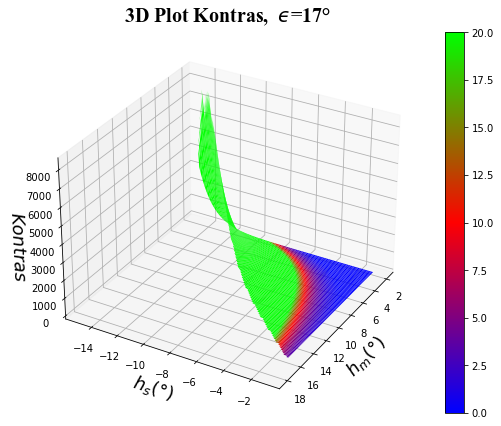

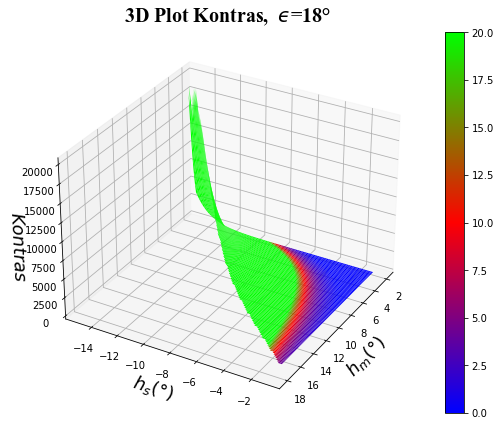

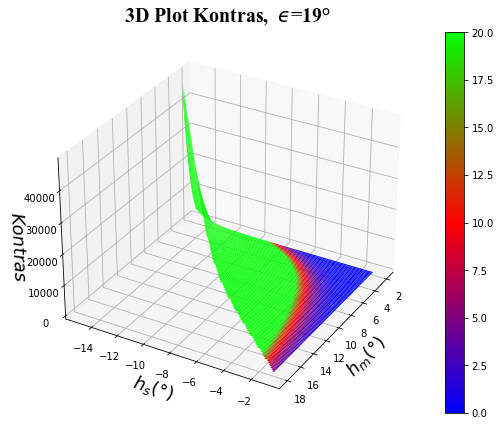

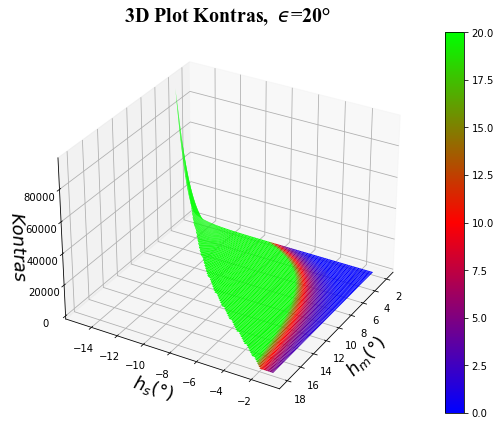

In [55]:
# Membuat plot 3D untuk kontras untuk nilai elongasi = 4 sampai 20

for el in range(4, 21, 1):
    hmo, hsu = np.meshgrid(hm, hs)
    Bsky = Bn(hmo) + Bt(hsu, hmo, el)
    c= Bs(hmo, el)/Bsky-1
    batas = hmo - hsu
    lala = np.select([batas <= el, batas > el], [c, np.NaN])

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(projection='3d')
    im = ax.plot_surface(hmo, hsu, lala, rstride=1, cstride=1,
                    cmap='brg', edgecolor='none')
    im.set_clim(0,20)
    fig.colorbar(im, orientation='vertical')
    ax.set_xlabel('$h_{m} (°)$', size=18, fontweight='bold')
    ax.set_ylabel('$h_{s} (°)$', size=18, fontweight='bold')
    ax.set_zlabel('$Kontras$', size=18, fontweight='bold')
    ax.set_title('3D Plot Kontras,  $ϵ$=' + str(el) + '°', fontsize=20, fontname='Times New Roman', pad=10, fontweight='bold')

# output plot 3D untuk kontras untuk nilai elongasi = 4 sampai 20
    ax.view_init(30, 30)
    plt.show()

Visualisasi Data dan Model setelah menemukan parameter Bo dan k yang terbaik

In [11]:
# membuka file data excel hasil optimasi

df = pd.read_excel('solver-data.xlsx')

In [12]:
# menampilkan data yang ada pada file excel

hm_d = df['hm']
hs_d = df['hs']
c_mod = df['Model Kontras Red']
c_mod2 = df['Model Kontras Green']
c_mod3 = df['Model Kontras Blue']
c_obs = df['Kontras Pengamatan Red']
c_obs2 = df['Kontras Pengamatan Green']
c_obs3 = df['Kontras Pengamatan Blue']

# menammpilkan data pada kolom tertentu
c_mod


0   -0.904
1   -0.863
2   -0.815
3   -0.481
4   -0.263
5    0.021
6    0.318
7    0.826
8    1.116
Name: Model Kontras Red, dtype: float64

In [13]:
# Membuat meshgrid hs dan hm untuk plot 3D

hmo_d, hsu_d = np.meshgrid(hm_d, hs_d)


C:\Users\User\AppData\Local\Temp/ipykernel_16580/3403947978.py:13: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  im = ax.plot_surface(hmo, hsu, lala, rstride=1, cstride=1,


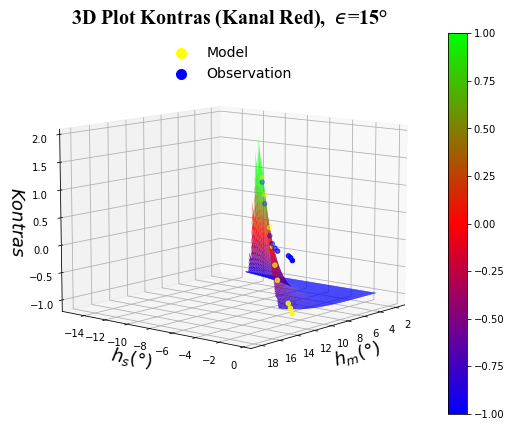

In [28]:
# Visualisasi data dan model pada kanal Red dalam plot 3D
# Pastikan sudah mengubah nilai parameter Bo dan k 

el = 15
hmo, hsu = np.meshgrid(hm, hs)
Bsky = Bn(hmo) + Bt(hsu, hmo, el)
c= Bs(hmo, el)/Bsky-1
batas = hmo - hsu
lala = np.select([batas <= el, batas > el], [c, np.NaN])

fig = plt.figure(figsize= (10, 7))
ax = fig.add_subplot(projection='3d')
im = ax.plot_surface(hmo, hsu, lala, rstride=1, cstride=1,
                cmap='brg', edgecolor='none')
im.set_clim(-1,1)
fig.colorbar(im, orientation='vertical')

ax.set_xlabel('$h_{m} (°)$', size=18, fontweight='bold')
ax.set_ylabel('$h_{s} (°)$', size=18, fontweight='bold')
ax.set_zlabel('$Kontras$', size=18, fontweight='bold')
ax.set_title('3D Plot Kontras (Kanal Red),  $ϵ$=' + str(el) + '°', fontsize=20, fontname='Times New Roman', pad=10, fontweight='bold')

ax.view_init(10, 40)

#add point data
ax.scatter3D(hm_d, hs_d, c_mod, cmap='brg', c='yellow')
ax.scatter3D(hm_d, hs_d, c_obs, cmap='brg', c='blue')



#add legend point data
ax.scatter3D([], [], [], c='yellow', label='Model', s=100)
ax.scatter3D([], [], [], c='blue', label='Observation', s=100)
ax.legend(loc='upper center', fontsize=14, frameon=False)


plt.show()

C:\Users\User\AppData\Local\Temp/ipykernel_16580/3557277863.py:13: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  im = ax.plot_surface(hmo, hsu, lala, rstride=1, cstride=1,


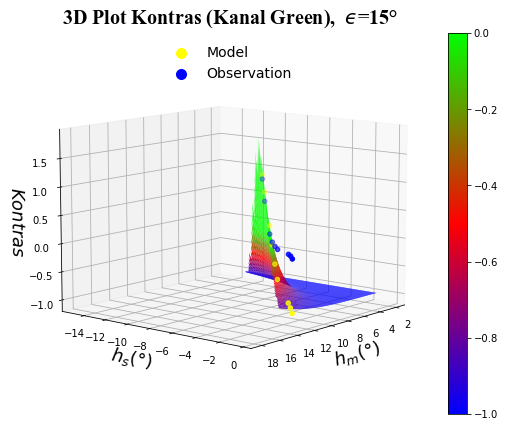

In [34]:
# Visualisasi data dan model pada kanal Green dalam plot 3D
# Pastikan sudah mengubah nilai parameter Bo dan k 

el = 15
hmo, hsu = np.meshgrid(hm, hs)
Bsky = Bn(hmo) + Bt(hsu, hmo, el)
c= Bs(hmo, el)/Bsky-1
batas = hmo - hsu
lala = np.select([batas <= el, batas > el], [c, np.NaN])

fig = plt.figure(figsize= (10, 7))
ax = fig.add_subplot(projection='3d')
im = ax.plot_surface(hmo, hsu, lala, rstride=1, cstride=1,
                cmap='brg', edgecolor='none')
im.set_clim(-1,0)
fig.colorbar(im, orientation='vertical')

ax.set_xlabel('$h_{m} (°)$', size=18, fontweight='bold')
ax.set_ylabel('$h_{s} (°)$', size=18, fontweight='bold')
ax.set_zlabel('$Kontras$', size=18, fontweight='bold')
ax.set_title('3D Plot Kontras (Kanal Green),  $ϵ$=' + str(el) + '°', fontsize=20, fontname='Times New Roman', pad=10, fontweight='bold')

ax.view_init(10, 40)

#add point data
ax.scatter3D(hm_d, hs_d, c_mod, cmap='brg', c='yellow')
ax.scatter3D(hm_d, hs_d, c_obs, cmap='brg', c='blue')



#add legend point data
ax.scatter3D([], [], [], c='yellow', label='Model', s=100)
ax.scatter3D([], [], [], c='blue', label='Observation', s=100)
ax.legend(loc='upper center', fontsize=14, frameon=False)


plt.show()

C:\Users\User\AppData\Local\Temp/ipykernel_16580/3100307983.py:13: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  im = ax.plot_surface(hmo, hsu, lala, rstride=1, cstride=1,


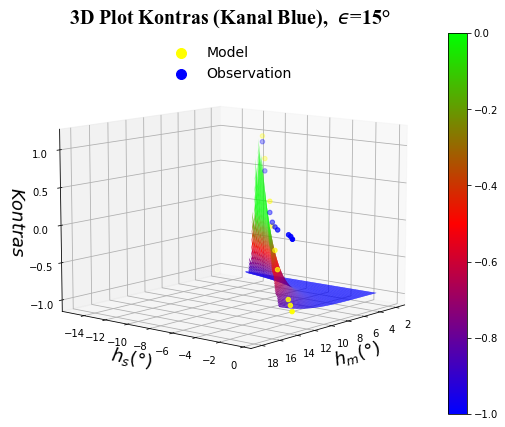

In [40]:
# Visualisasi data dan model pada kanal Blue dalam plot 3D
# Pastikan sudah mengubah nilai parameter Bo dan k 

el = 15
hmo, hsu = np.meshgrid(hm, hs)
Bsky = Bn(hmo) + Bt(hsu, hmo, el)
c= Bs(hmo, el)/Bsky-1
batas = hmo - hsu
lala = np.select([batas <= el, batas > el], [c, np.NaN])

fig = plt.figure(figsize= (10, 7))
ax = fig.add_subplot(projection='3d')
im = ax.plot_surface(hmo, hsu, lala, rstride=1, cstride=1,
                cmap='brg', edgecolor='none')
im.set_clim(-1,0)
fig.colorbar(im, orientation='vertical')

ax.set_xlabel('$h_{m} (°)$', size=18, fontweight='bold')
ax.set_ylabel('$h_{s} (°)$', size=18, fontweight='bold')
ax.set_zlabel('$Kontras$', size=18, fontweight='bold')
ax.set_title('3D Plot Kontras (Kanal Blue),  $ϵ$=' + str(el) + '°', fontsize=20, fontname='Times New Roman', pad=10, fontweight='bold')

ax.view_init(10, 40)

#add point data
ax.scatter3D(hm_d, hs_d, c_mod, cmap='brg', c='yellow')
ax.scatter3D(hm_d, hs_d, c_obs, cmap='brg', c='blue')



#add legend point data
ax.scatter3D([], [], [], c='yellow', label='Model', s=100)
ax.scatter3D([], [], [], c='blue', label='Observation', s=100)
ax.legend(loc='upper center', fontsize=14, frameon=False)


plt.show()